In [353]:
import pandas as pd
import numpy as np
import json

#### Load the manually arranged besucherstatistik table

In [354]:
df = pd.read_csv("csv/besucherstatistik-alle-vorbereitet.csv", delimiter=";", na_values=["-"])
df

,Institution_11_12,2011,2012,Institution_13_14,2013,2014,Bemerkung_11_12,Bemerkung_13_14,Kategorie,Block
0,Deutsches Theater / Kammerspiele,165.405,162.136,Deutsches Theater / Kammerspiele,189.135,180.769,NaN,NaN,Große Sprechbühnen,1
1,Volksbühne,135.284,143.292,Volksbühne,175.393,170.205,NaN,NaN,Große Sprechbühnen,1
2,Maxim Gorki Theater,92.056,79.984,Maxim Gorki Theater,69.745,101.035,NaN,NaN,Große Sprechbühnen,1
3,Berliner Ensemble,188.406,181.639,Berliner Ensemble,228.207,231.151,NaN,NaN,Große Sprechbühnen,1
4,"Hebbel am Ufer (HAU 1, 2, 3)",89.692,61.963,"Hebbel am Ufer (HAU 1, 2, 3)",65.979,59.830,NaN,NaN,Große Sprechbühnen,1
...,...,...,...,...,...,...,...,...,...,...
127,Tanzfabrik Berlin e.V.,5.789,5.706,Tanzfabrik Berlin e.V.,5.528,6.416,NaN,"Performences sind oft eintrittsfrei, deshalb o...",Spielstättenförderung,10
128,Dock 11,13.803,11.787,Dock 11,11.373,8.400,NaN,"Performences sind oft eintrittsfrei, deshalb o...",Spielstättenförderung,10
129,Laborgras,1.610,963,Laborgras,1.317,204,NaN,"Performences sind oft eintrittsfrei, deshalb o...",Spielstättenförderung,10
130,ada Studio & Bühne,1.243,1.077,ada Studio & Bühne,982,1.047,NaN,"Performences sind oft eintrittsfrei, deshalb o...",Spielstättenförderung,10


#### Preprocess Besucherstatistik

In [355]:
# there are unique "Institutions" in the 2011_2012 and 2013_2014 table. Create a single institution column by merging them. 
institution = df['Institution_13_14'].copy()
institution[institution.isna()] = df['Institution_11_12'][institution.isna()]
df = df.drop(columns=['Institution_11_12', 'Institution_13_14'])

# remove newlines from institution string
df['Institution'] = institution.replace(r'\n',' ', regex=True) 

df['Institution'] = df['Institution'].str.strip()

In [356]:
# remove leading and trailing whitespaces
df['Kategorie'] = df['Kategorie'].str.strip()

In [357]:
# convert numerical columns
df['Block'] = df['Block'].astype('int8')

num_cols = ['2011','2012','2013', '2014']

if df['2013'][66] == 'geschlossen':
    df.at[66, '2013'] = np.nan

df[num_cols] = df[num_cols].apply(lambda s : s.str.replace('.', '', regex=False), axis=1)
df[num_cols] = df[num_cols].apply(lambda s : s.str.replace(' ', '', regex=False), axis=1)
df[num_cols] = df[num_cols].fillna(0)
df[num_cols] = df[num_cols].astype(int)

#### Load kultureinrichtungen_alle

In [358]:
locs = pd.read_csv("csv/kultureinrichtungen_alle.csv", delimiter=";", na_values=["-"])
locs['Institution'] = locs['Institution'].replace(r'\n',' ', regex=True)
locs['Institution'] = locs['Institution'].str.strip()

display(locs)

,Institution,Adresse,Lat,Lon,Haltestelle,HaltestelleLat,HaltestelleLon,Entfernung,SUBahn,SUEntfernung,Betreiber,GruppeA,GruppeB
0,Deutsches Theater / Kammerspiele,"Schumannstraße 13,10117 Berlin",52.523917,13.382083,Deutsches Theater,52.523.126,13.383.266,118.0,U Oranienburger Tor,385.0,NaN,Bühnen und Theater,Große Sprechbühnen
1,Volksbühne,"Rosa-Luxemburg-Platz,10178 Berlin",52.527250,13.412389,U Rosa-Luxemburg-Platz,52.528.187,13.410.404,170.0,U Rosa-Luxemburg-Platz,170.0,NaN,Bühnen und Theater,Große Sprechbühnen
2,Maxim Gorki Theater,"Am Festungsgraben 2,10117 Berlin",52.519000,13.395611,Am Kupfergraben,52.519.413,13.395.392,49.0,NaN,NaN,NaN,Bühnen und Theater,Große Sprechbühnen
3,Berliner Ensemble,"Bertolt-Brecht-Platz 1,10117 Berlin",52.522056,13.386417,Am Weidendamm,52.521.912,13.388.452,138.0,S+U Friedrichstr.,204.0,NaN,Bühnen und Theater,Große Sprechbühnen
4,"Hebbel am Ufer (HAU 1, 2, 3)","Hallesches Ufer 32,10963 Berlin",52.499056,13.386194,Willy-Brandt-Haus,5.250.041,13.387.437,173.0,U Möckernbrücke,198.0,NaN,Bühnen und Theater,Große Sprechbühnen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Heimathafen Neukölln,"Karl-Marx-Straße 141,12043 Berlin",52.476972,13.439194,U Karl-Marx-Str.,52.476.427,13.439.808,73.0,U Karl-Marx-Str.,73.0,NaN,Förderung,Spielstättenförderung
111,Tanzfabrik Berlin e.V.,"Uferstraße 23,13357 Berlin",52.551778,13.374944,Uferstr.,52.553.258,13.378.169,273.0,U Pankstr.,469.0,NaN,Förderung,Spielstättenförderung
112,Dock 11,"Kastanienallee 79,10435 Berlin",52.536667,13.408028,Schwedter Str.,52.536.834,13.407.959,19.0,U Senefelderplatz,547.0,NaN,Förderung,Spielstättenförderung
113,Laborgras,"Großbeerenstraße 56E, 10965 Berlin",52.496806,13.421389,Kottbusser Brücke,52.495.538,13.420.697,147.0,U Kottbusser Tor,232.0,NaN,Förderung,Spielstättenförderung


#### Merge Kultureinrichtung and Besucherstatistik
Unfortunately the institution names don't necessarily match => use the beginning of the name + string similarity measure for merge.

In [359]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

df['foreign_key'] = np.nan

for index, row in df.iterrows():
    
    # find if the names start equally
    idx = np.argmax([row["Institution"].startswith(b) for b in locs["Institution"]])
    if idx == 0:

        # if no equally starting name is found use string similarity
        if not row["Institution"].startswith(locs["Institution"][0]):
            simi = [similar(row["Institution"], b) for b in locs["Institution"]]
            if np.max(simi) < 0.7:
                 # threshold of 0.7 was set manually by oberserving the wrong matches below
                print(f'{row["Institution"]} == {locs["Institution"][np.argmax(simi)]} ({max(simi):.2f})?')
                idx = None
            else:
                # "cie. toula limnaios" exists two times in different categories!!!
                if(row['Institution'] == "cie. toula limnaios"):
                    idx = None
                else:
                    idx = np.argmax(simi)

    if idx != None:
        df.at[index, 'foreign_key'] = locs.iloc[idx]['Institution']
    else: 
        df.at[index, 'foreign_key'] = ''

prime time theater == Maxim Gorki Theater (0.59)?
Käthe-Kollwitz-Museum == Stiftung Georg-Kolbe-Museum (0.54)?
Museum für Vor- und Frühgeschichte im Martin Gropius-Bau == Neues Museum mit Ägyptisches Museum, Museum für Vor- und Frühgeschichte - Museumsinsel (0.56)?
Monster Truck == Theater Thikwà (0.44)?
kaleidoskop == cie toula limnaios (0.34)?
Showcase beat Le Mot == Schlosspark Theater (0.46)?
isabelle Schad == Gob Squad (0.43)?
Kroesinger, Hans-Werner == Hamburger Bahnhof - Tiergarten (0.42)?
make up productions/A. Baehr == ada Studio & Bühne (0.39)?
MS Schrittmacher/M. Stiefermann == Schlossplatztheater (0.40)?
Martin Nachbar == Hans Wurst Nachfahren (0.57)?
Laurent Chétouane == Pfaueninsel (0.43)?
WilhelmGroener == English Theatre Berlin (0.39)?
Christoph Winkler == Sophiensæle (0.50)?
Christina Ciupke == Canstanza Macras (0.38)?
Brotfabrik == ufa-fabrik e.V. (0.48)?


In [360]:
df = df.merge(locs, how='outer', left_on='foreign_key', right_on='Institution')
df = df.rename(columns = {'Institution_x':'Institution_Besucherstatistik', 'Institution_y':'Institution_Kultureinrichtungen'})

In [361]:
# Check for Institutions without any data
np.setdiff1d(locs['Institution'].values, df['foreign_key'].values)

array([], dtype=object)

#### Further preprocessing of the merged data frame

In [362]:
# Fill in missing GruppeA values
GruppeA = df[['Block', 'GruppeA']].dropna().groupby(by='Block')['GruppeA'].unique().apply(lambda x: x[0])
display(GruppeA)
df['GruppeA'] = GruppeA[df['Block']].reset_index()['GruppeA'].str.strip()

Block
1                                    Bühnen und Theater
2                                       Opern und Chöre
3                                    Literatur und Kino
4                                 Berliner Landesmuseen
5     Staatliche Museen zu Berlin / Stiftung Preußis...
6                         Preußische Schlösser & Gärten
7                                         Gedenkstätten
8                                        Bildende Kunst
9                                 Archive/Bibliotheken 
10                                            Förderung
Name: GruppeA, dtype: object

In [363]:
# copy Kategorie where GruppeB has a different value
mask = df['Kategorie'] != df['GruppeB']
df.loc[mask, 'GruppeB' ] = df[mask]['Kategorie']

In [364]:
missing = pd.read_csv("csv/missing.csv", delimiter=";")

for index, row in df[df['Adresse'].isna()].iterrows():
    temp = missing[missing['Institution_x'] == row['Institution_Besucherstatistik']].iloc[0]
    df.at[index, 'Adresse'] = temp['Adresse']
    df.at[index, 'Lon'] = temp['Lon']
    df.at[index, 'Lat'] = temp['Lat']

In [365]:
# fix two missing zip codes
df.loc[df['Institution_Besucherstatistik'] == 'Zeitgenössische Oper Berlin', 'Adresse'] = 'Schwedter Str. 269, 10119 Berlin'
df.loc[df['Institution_Besucherstatistik'] == 'Pfaueninsel', 'Adresse'] = 'Pfaueninsel, 14109 Berlin'


# Extract and translate zip code

df['PLZ'] = df['Adresse'].str.extract(r'(\d{5}\-?\d{0,4})')

with open("plz.txt") as f:

    zip2district = {}

    district = ""
    for line in f.readlines():

        if line.startswith("Postleitzahlen in"):
            district = line.replace("Postleitzahlen in ", "").strip()
        if line.startswith("1"):
            for n in list(
                map(int, line.replace("\n", "").replace(".", ",").split(", "))
            ):
                zip2district[n] = district

    df['Bezirk'] = df['PLZ'].astype(float).map(zip2district).fillna(df['PLZ'])

In [366]:
# for the missing Institution_Kultureinrichtungen use the Institution_Besucherstatistik
mask = df['Institution_Kultureinrichtungen'].isna()
df.loc[mask, 'Institution_Kultureinrichtungen'] = df[mask]['Institution_Besucherstatistik']

Drop all with address still missing!

In [367]:
display(df[df['Adresse'].isna()])
df = df[df['Adresse'].notna()]

,2011,2012,2013,2014,Bemerkung_11_12,Bemerkung_13_14,Kategorie,Block,Institution_Besucherstatistik,foreign_key,...,HaltestelleLat,HaltestelleLon,Entfernung,SUBahn,SUEntfernung,Betreiber,GruppeA,GruppeB,PLZ,Bezirk
28,0,0,331,1235,NaN,"Performences sind oft eintrittsfrei, deshalb o...",Basisförderung,10,isabelle Schad,,...,NaN,NaN,NaN,NaN,NaN,NaN,Förderung,Basisförderung,NaN,NaN
32,0,0,0,482,NaN,"Performences sind oft eintrittsfrei, deshalb o...",Basisförderung,10,Martin Nachbar,,...,NaN,NaN,NaN,NaN,NaN,NaN,Förderung,Basisförderung,NaN,NaN
33,0,0,1117,661,NaN,"Performences sind oft eintrittsfrei, deshalb o...",Basisförderung,10,Laurent Chétouane,,...,NaN,NaN,NaN,NaN,NaN,NaN,Förderung,Basisförderung,NaN,NaN


In [368]:
df = df.drop(
    columns=[
        "Haltestelle",
        "HaltestelleLat",
        "HaltestelleLon",
        "foreign_key",
        "Entfernung",
        "SUBahn",
        "SUEntfernung",
        "Kategorie",
        "Block",
        "Betreiber",
    ]
)
df.isna().sum()

2011                                 0
2012                                 0
2013                                 0
2014                                 0
Bemerkung_11_12                    110
Bemerkung_13_14                     86
Institution_Besucherstatistik        0
Institution_Kultureinrichtungen      0
Adresse                              0
Lat                                  0
Lon                                  0
GruppeA                              0
GruppeB                              0
PLZ                                  0
Bezirk                               0
dtype: int64

Institution_Besucherstatistik are the names from the Besucherstatistik table.

Institution_Kultureinrichtungen are the names from the Kultureinrichtungen table (mostly shorter but some are missing).

Since there are 17 locations without adresses in the Kultureinrichtungen table, fill those with Institution_Besucherstatistik.

Then use the Institution_Kultureinrichtungen as keys since they are shorter.

# Write to JSON

In [369]:
df = df.set_index(df['Institution_Kultureinrichtungen'])
d = df.to_dict(orient='index')

# replace all NaN wit None
for k1, v1 in d.items():
    for k2, v2 in v1.items():
        if str(v2) == 'nan':
            d[k1][k2] = None


with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(d, f, ensure_ascii=False, indent=4)

In [370]:
df.sort_values(by='2014', ascending=False).head(10)

,2011,2012,2013,2014,Bemerkung_11_12,Bemerkung_13_14,Institution_Besucherstatistik,Institution_Kultureinrichtungen,Adresse,Lat,Lon,GruppeA,GruppeB,PLZ,Bezirk
Institution_Kultureinrichtungen,,,,,,,,,,,,,,,
Stiftung Topographie des Terrors,800000,947722,1195581,1362229,NaN,NaN,Stiftung Topographie des Terrors,Stiftung Topographie des Terrors,"Niederkirchnerstraße 8,10963 Berlin",52.506694,13.383667,Gedenkstätten,Gedenkstätten,10963,Mitte
Stiftung Zentral- und Landesbibliothek Berlin,1220543,1195432,1317473,1305523,Genderdaten ab 2012 verfügbar,NaN,Stiftung Zentral- und Landesbibliothek Berlin,Stiftung Zentral- und Landesbibliothek Berlin,"Breite Straße 30-36,10178 Berlin",52.515250,13.404500,Archive/Bibliotheken,Archive/Bibliotheken,10178,Mitte
Stiftung Berliner Mauer,650000,700000,850000,1050000,NaN,NaN,Stiftung Berliner Mauer,Stiftung Berliner Mauer,"Bernauer Str. 111,13355 Berlin",52.535361,13.389833,Gedenkstätten,Gedenkstätten,13355,Mitte
"Pergamonmuseum mit Antikensammlung, Museum für Islamische Kunst, Vorderasiatischem Museum, Münzkabinett - Musuemsinsel",1305000,1410000,1290000,995000,"2011: Sonderausstellung ""Pergamon, Panorama de...",NaN,"Pergamonmuseum mit Antikensammlung, Museum für...","Pergamonmuseum mit Antikensammlung, Museum für...","Bodestraße 1-3, 10178 Berlin",52.519400,13.398830,Staatliche Museen zu Berlin / Stiftung Preußis...,Staatliche Museen zu Berlin / Stiftung Preußis...,10178,Mitte
Staatsbibliothek,1029944,935207,914561,920000,NaN,NaN,Staatsbibliothek,Staatsbibliothek,"Unter den Linden 8, 10117 Berlin",52.517520,13.390990,Staatliche Museen zu Berlin / Stiftung Preußis...,Staatliche Museen zu Berlin / Stiftung Preußis...,10117,Mitte
Stiftung Deutsches Technikmuseum Berlin,630736,581912,668738,638196,NaN,NaN,Stiftung Deutsches Technikmuseum Berlin,Stiftung Deutsches Technikmuseum Berlin,"Trebbiner Str. 9, 10963 Berlin",52.498630,13.376840,Berliner Landesmuseen,Berliner Landesmuseen,10963,Mitte
"Neues Museum mit Ägyptisches Museum, Museum für Vor- und Frühgeschichte - Museumsinsel",903000,701000,963000,633000,NaN,NaN,"Neues Museum mit Ägyptisches Museum, Museum fü...","Neues Museum mit Ägyptisches Museum, Museum fü...","Bodestraße 1-3, 10178 Berlin",52.519400,13.398830,Staatliche Museen zu Berlin / Stiftung Preußis...,Staatliche Museen zu Berlin / Stiftung Preußis...,10178,Mitte
Friedrichstadt-Palast,451767,445388,522209,472532,NaN,NaN,Friedrichstadt-Palast,Friedrichstadt-Palast,"Friedrichstraße 107,10117 Berlin",52.523917,13.388861,Bühnen und Theater,Konzeptgeförderte Theater und Theater-/Tanzgru...,10117,Mitte
Stiftung Gedenkstätte Berlin-Hohenschönhausen,331580,353828,378314,436482,NaN,NaN,Stiftung Gedenkstätte Berlin-Hohenschönhausen,Stiftung Gedenkstätte Berlin-Hohenschönhausen,"Genslerstraße 66,13055 Berlin",52.541806,13.501417,Gedenkstätten,Gedenkstätten,13055,Lichtenberg


# Test visualisations

/var/folders/d7/6rwzv4n55v385stdz71392180000gn/T/ipykernel_8913/1146979300.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df.groupby(by='Bezirk').sum()['2014']


<AxesSubplot: xlabel='Bezirk'>

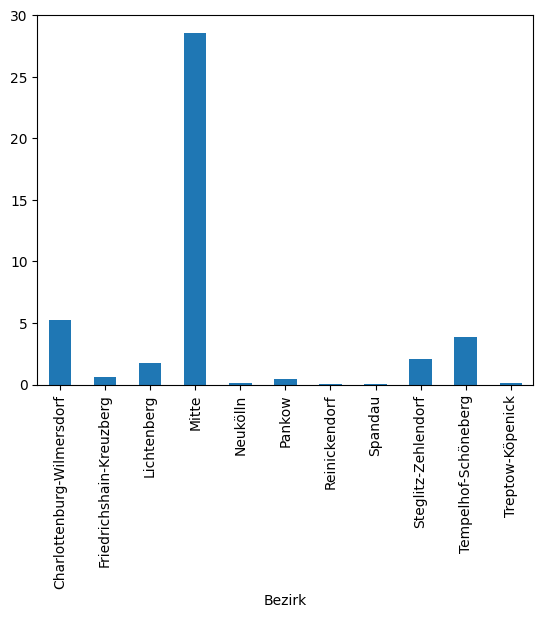

In [371]:
# https://de.wikipedia.org/wiki/Bevölkerung_von_Berlin
pop_per_district = {
    "Mitte": 385692,
    "Friedrichshain-Kreuzberg": 289014,
    "Pankow": 413168,
    "Charlottenburg-Wilmersdorf": 333998,
    "Spandau": 247396,
    "Steglitz-Zehlendorf": 307135,
    "Tempelhof-Schöneberg": 348523,
    "Neukölln": 327100,
    "Treptow-Köpenick": 280357,
    "Marzahn-Hellersdorf": 277639,
    "Lichtenberg": 299686,
    "Reinickendorf": 265772,
}

pop_per_district = pd.DataFrame.from_dict(pop_per_district, orient='index', columns=['population'])

temp = df.groupby(by='Bezirk').sum()['2014']
mask = list(temp.index)
temp.div(pop_per_district.loc[mask].values.flatten()).plot(kind='bar', logy=False)

/var/folders/d7/6rwzv4n55v385stdz71392180000gn/T/ipykernel_8913/4138574062.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Bezirk').sum()['2014'].plot(kind='bar', logy=False)


<AxesSubplot: xlabel='Bezirk'>

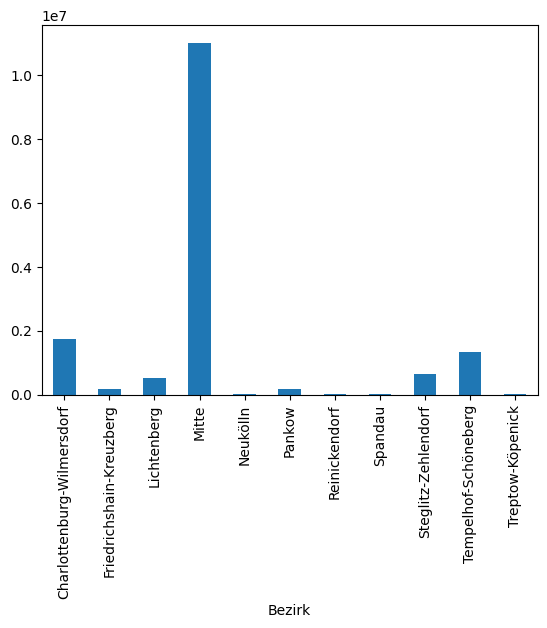

In [372]:
df.groupby(by='Bezirk').sum()['2014'].plot(kind='bar', logy=False)

<AxesSubplot: xlabel='Bezirk'>

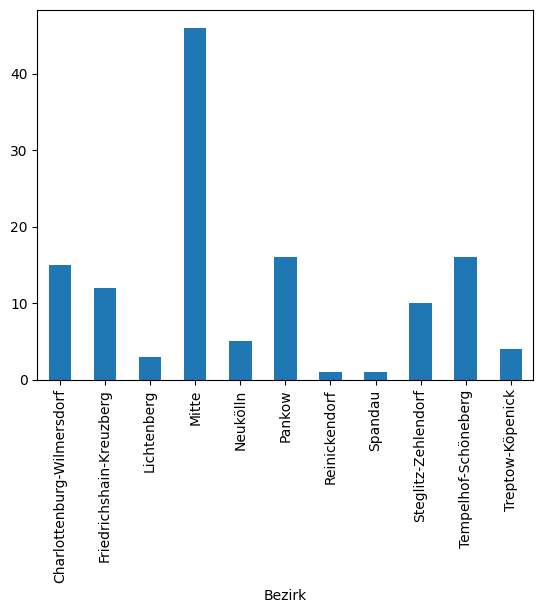

In [373]:
df.groupby(by='Bezirk').count()['2014'].plot(kind='bar')

/var/folders/d7/6rwzv4n55v385stdz71392180000gn/T/ipykernel_8913/4183089509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Bezirk').sum()['2014'].plot(kind='bar', logy=True)


<AxesSubplot: xlabel='Bezirk'>

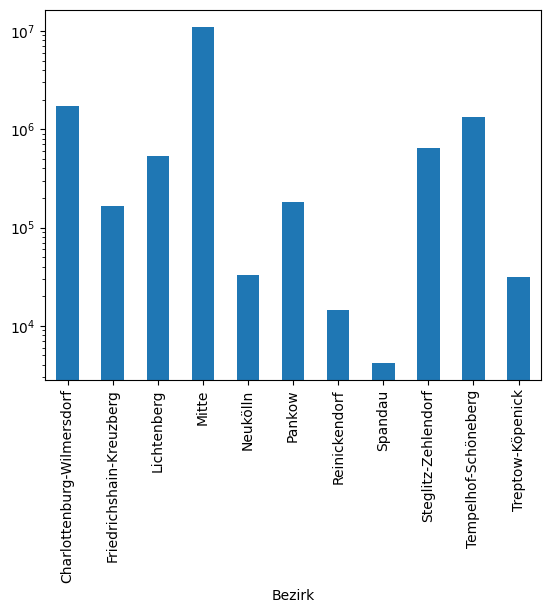

In [374]:
df.groupby(by='Bezirk').sum()['2014'].plot(kind='bar', logy=True)

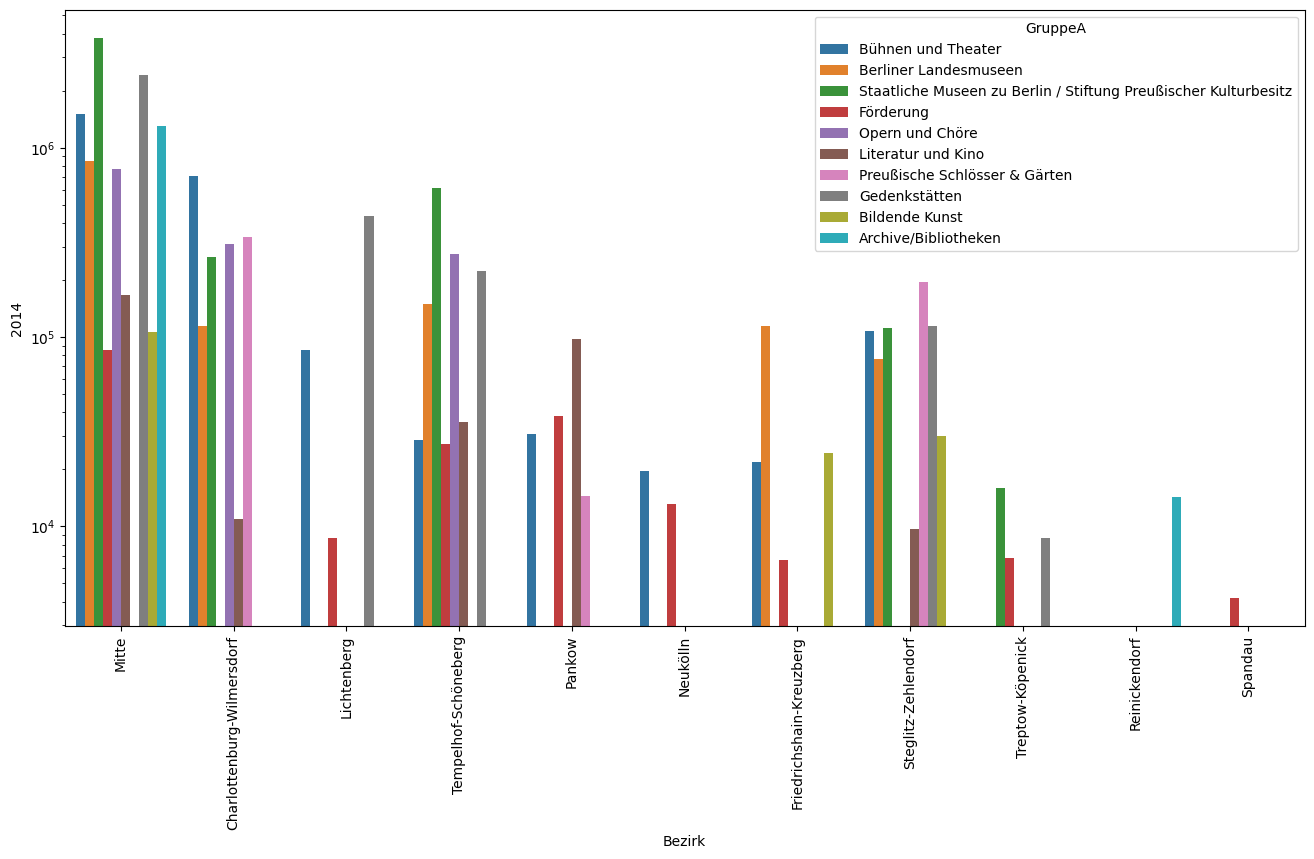

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(16,8))
g = sns.barplot(data=df, x='Bezirk', y='2014', hue='GruppeA', errorbar=None, estimator=sum)
g.set(yscale="log")
plt.xticks(rotation=90)
plt.show()

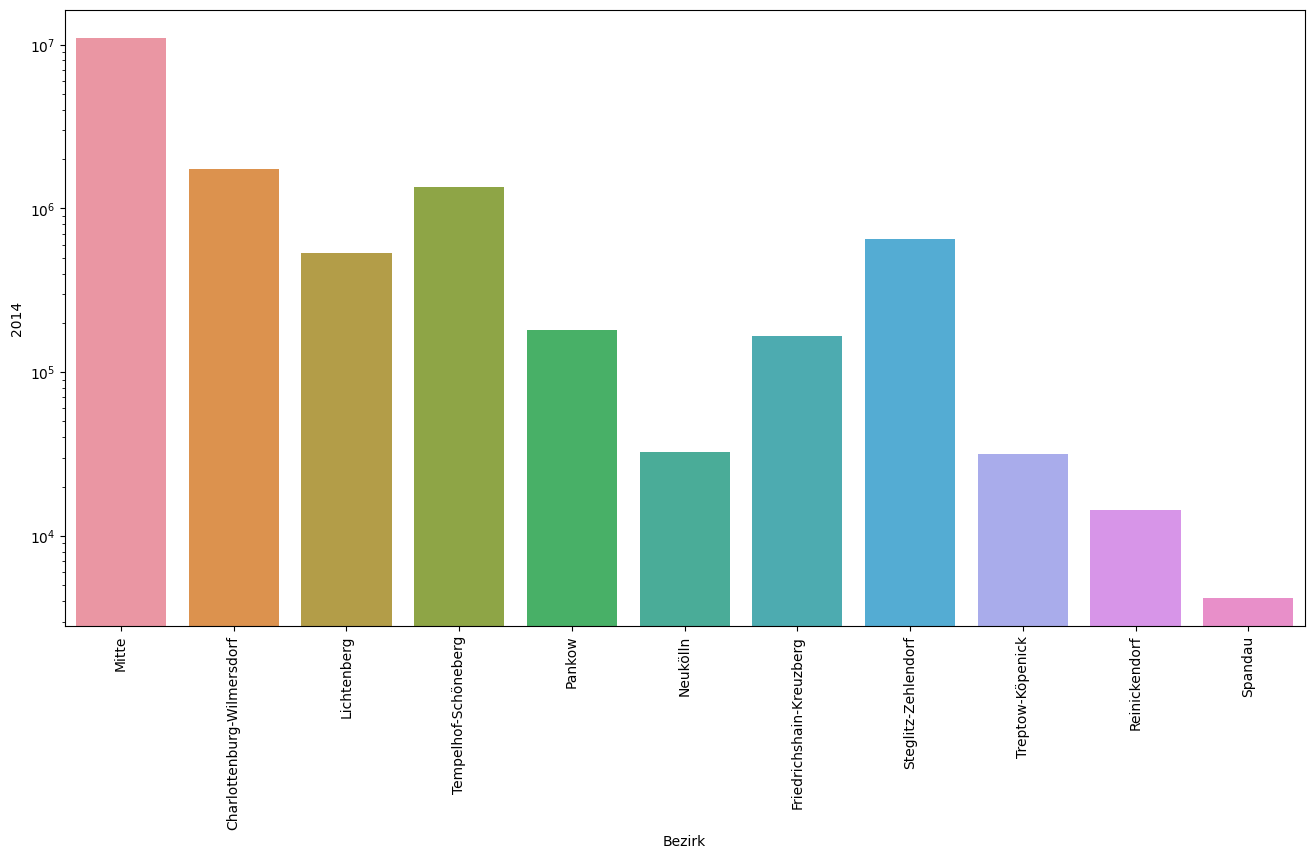

In [376]:
plt.subplots(figsize=(16,8))
g = sns.barplot(data=df, x='Bezirk', y='2014', errorbar=None, estimator=sum)
g.set(yscale="log")
plt.xticks(rotation=90)
plt.show()

In [377]:
df.groupby(by='Bezirk').count()

,2011,2012,2013,2014,Bemerkung_11_12,Bemerkung_13_14,Institution_Besucherstatistik,Institution_Kultureinrichtungen,Adresse,Lat,Lon,GruppeA,GruppeB,PLZ
Bezirk,,,,,,,,,,,,,,
Charlottenburg-Wilmersdorf,15,15,15,15,3,2,15,15,15,15,15,15,15,15
Friedrichshain-Kreuzberg,12,12,12,12,2,6,12,12,12,12,12,12,12,12
Lichtenberg,3,3,3,3,0,1,3,3,3,3,3,3,3,3
Mitte,46,46,46,46,6,10,46,46,46,46,46,46,46,46
Neukölln,5,5,5,5,0,3,5,5,5,5,5,5,5,5
Pankow,16,16,16,16,1,11,16,16,16,16,16,16,16,16
Reinickendorf,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Spandau,1,1,1,1,0,1,1,1,1,1,1,1,1,1
Steglitz-Zehlendorf,10,10,10,10,4,1,10,10,10,10,10,10,10,10
